In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
games = pd.read_csv("moved_games.csv")
games.head(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
columns = games.columns
new_columns = []
for col in columns:
    new_columns.append(col.lower())

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.columns = new_columns
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Deleting missing values could be appropriate if they constitute a large proportion of the total data or if the missing values are missing completely at random (MCAR) which means that the missing values are not related to the values of other variables in the dataset. In this case, deleting missing values may result in a more representative and unbiased sample for analysis.

In [6]:
games = games.dropna()

In [7]:
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7878 non-null   object 
 1   platform         7878 non-null   object 
 2   year_of_release  7878 non-null   float64
 3   genre            7878 non-null   object 
 4   na_sales         7878 non-null   float64
 5   eu_sales         7878 non-null   float64
 6   jp_sales         7878 non-null   float64
 7   other_sales      7878 non-null   float64
 8   critic_score     7878 non-null   float64
 9   user_score       7878 non-null   object 
 10  rating           7878 non-null   object 
dtypes: float64(6), object(5)
memory usage: 738.6+ KB


In [9]:
games["year_of_release"] = games["year_of_release"].astype('int64')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7878 non-null   object 
 1   platform         7878 non-null   object 
 2   year_of_release  7878 non-null   int64  
 3   genre            7878 non-null   object 
 4   na_sales         7878 non-null   float64
 5   eu_sales         7878 non-null   float64
 6   jp_sales         7878 non-null   float64
 7   other_sales      7878 non-null   float64
 8   critic_score     7878 non-null   float64
 9   user_score       7878 non-null   object 
 10  rating           7878 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 738.6+ KB


In [10]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,7878.000000,7878.000000,7878.000000,7878.000000,7878.000000,7878.000000
mean,2007.159304,0.357878,0.211203,0.056206,0.073679,68.998604
std,4.157296,0.907239,0.644037,0.268770,0.252806,13.923470
min,1985.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,60.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,71.000000
75%,2010.000000,0.350000,0.180000,0.010000,0.060000,79.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000


In [11]:
games['user_score'] = games['user_score'].replace(['tbd'], [0])

In [12]:
games["user_score"] = games["user_score"].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7878 non-null   object 
 1   platform         7878 non-null   object 
 2   year_of_release  7878 non-null   int64  
 3   genre            7878 non-null   object 
 4   na_sales         7878 non-null   float64
 5   eu_sales         7878 non-null   float64
 6   jp_sales         7878 non-null   float64
 7   other_sales      7878 non-null   float64
 8   critic_score     7878 non-null   float64
 9   user_score       7878 non-null   float64
 10  rating           7878 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 738.6+ KB


In [13]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,7878.000000,7878.000000,7878.000000,7878.000000,7878.000000,7878.000000,7878.000000
mean,2007.159304,0.357878,0.211203,0.056206,0.073679,68.998604,6.225552
std,4.157296,0.907239,0.644037,0.268770,0.252806,13.923470,2.787905
min,1985.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,60.000000,5.600000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,71.000000,7.300000
75%,2010.000000,0.350000,0.180000,0.010000,0.060000,79.000000,8.100000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.600000


In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [15]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [16]:
# Assuming 'df' is your pandas DataFrame containing the data
# 'Year_of_Release' represents the column with the release years

# Counting the number of games released in each year
games_per_year = games['year_of_release'].value_counts().sort_index()
games_per_year


1985      1
1988      1
1992      1
1994      1
1996      7
1997     14
1998     25
1999     36
2000    141
2001    325
2002    627
2003    582
2004    556
2005    652
2006    617
2007    692
2008    708
2009    644
2010    496
2011    486
2012    313
2013    267
2014    257
2015    212
2016    217
Name: year_of_release, dtype: int64

Significant Periods:
2000    141
2001    325
2002    627
2003    582
2004    556
2005    652
2006    617
2007    692
2008    708
2009    644
2010    496
2011    486
2012    313
2013    267
2014    257
2015    212
2016    217
Name: year_of_release, dtype: int64


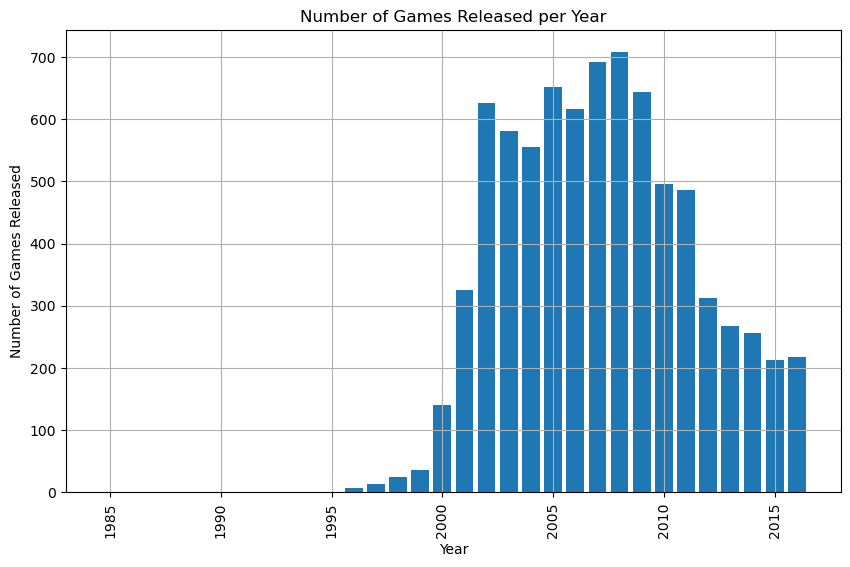

In [17]:
# Plotting the number of games released per year
plt.figure(figsize=(10, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released per Year')
plt.xticks(rotation=90)
plt.grid()

significant_periods = games_per_year[games_per_year >= 100]  # Consider periods with 100 or more games as significant

# Printing the significant periods and their corresponding game counts
print('Significant Periods:')
print(significant_periods)

# Displaying the graph
plt.show()

In [18]:
# Group the data by region and platform and calculate the total sales
region_platform_sales = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)

# sort the platforms by total sales and select the top 5
top_platforms = region_platform_sales.sort_values(ascending=False).head(5)
top_platforms


platform
PS2     981.53
X360    858.66
PS3     788.92
Wii     682.11
DS      433.97
Name: total_sales, dtype: float64

In [19]:
# filter the data to only include the top platforms
top_platform_data = games[games['platform'].isin(top_platforms.index)]
top_platform_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,World Heroes Anthology,PS2,2007,Fighting,0.00,0.00,0.01,0.00,53.0,0.0,T,0.01
16529,Hoshigami: Ruining Blue Earth Remix,DS,2007,Role-Playing,0.00,0.00,0.01,0.00,55.0,7.9,T,0.01
16591,Micro Machines V4,PS2,2006,Racing,0.01,0.00,0.00,0.00,64.0,6.8,E,0.01
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


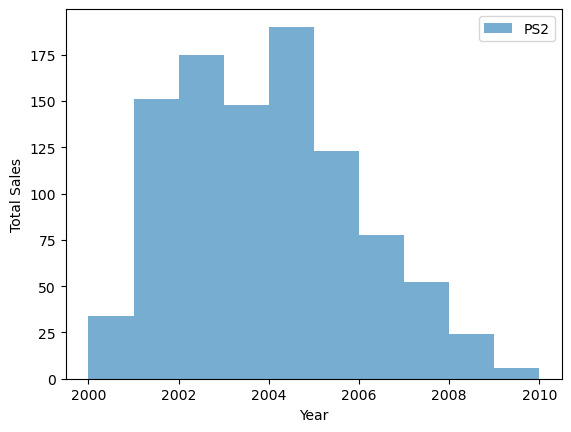

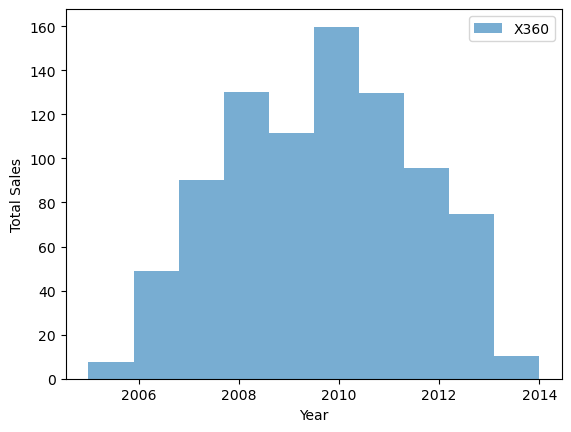

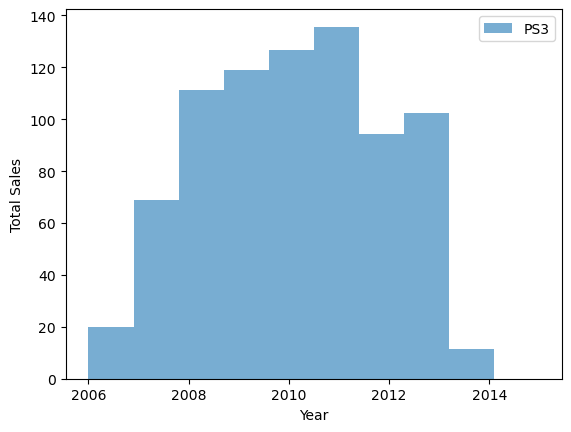

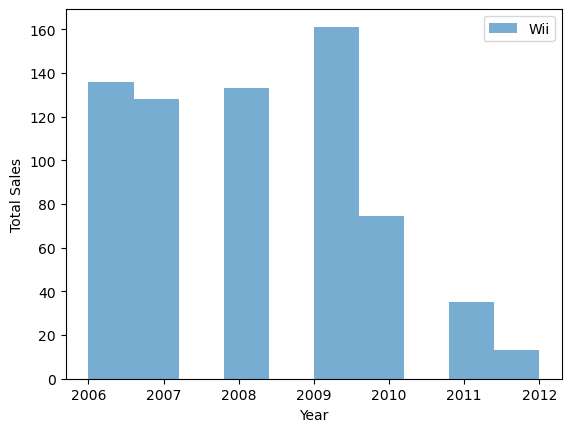

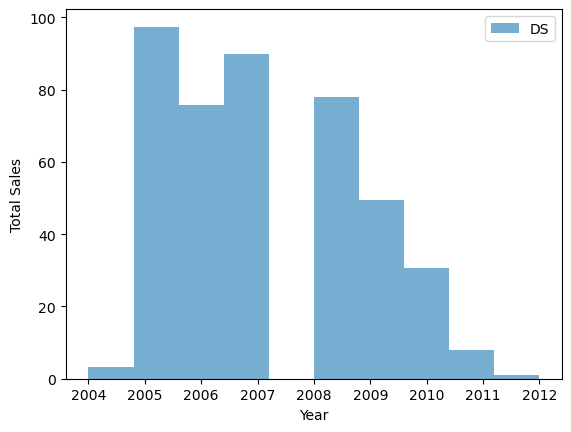

In [20]:
# plot the distribution of sales for each platform by year

for platform in top_platforms.index:
    fig,axis = plt.subplots()
    platform_data = top_platform_data[top_platform_data['platform'] == platform]
    plt.hist(platform_data['year_of_release'], weights=platform_data['total_sales'], alpha=0.6, label=platform)

    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()

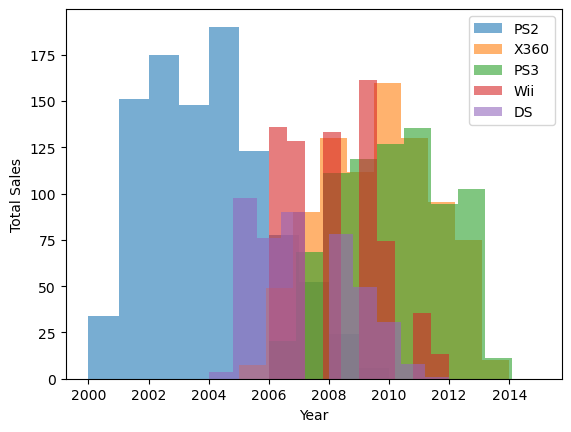

In [21]:
# plot the distribution of sales for each platform by year
for platform in top_platforms.index:
    platform_data = top_platform_data[top_platform_data['platform'] == platform]
    plt.hist(platform_data['year_of_release'], weights=platform_data['total_sales'], alpha=0.6, label=platform)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [22]:
data = games.query('year_of_release >= 2010', inplace = False).sort_values('year_of_release', ascending = False)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10963,Football Manager 2017,PC,2016,Simulation,0.00,0.09,0.00,0.01,81.0,4.3,E,0.10
13464,Root Letter,PSV,2016,Adventure,0.00,0.03,0.01,0.01,78.0,7.8,M,0.05
6995,XCOM 2,PC,2016,Strategy,0.09,0.12,0.00,0.02,88.0,7.1,T,0.23
8339,Deus Ex: Mankind Divided,XOne,2016,Role-Playing,0.09,0.06,0.00,0.01,83.0,7.2,M,0.16
3250,Mafia III,XOne,2016,Action,0.28,0.29,0.00,0.05,67.0,4.6,M,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...
4427,SOCOM: U.S. Navy SEALs Fireteam Bravo 3,PSP,2010,Shooter,0.17,0.13,0.06,0.08,74.0,8.0,T,0.44
10319,Cabela's North American Adventures,X360,2010,Sports,0.10,0.00,0.00,0.01,51.0,9.0,T,0.11
4379,Brunswick Pro Bowling,X360,2010,Sports,0.38,0.04,0.00,0.03,44.0,0.0,E,0.45
4372,Disney Guilty Party,Wii,2010,Misc,0.42,0.00,0.00,0.03,78.0,8.0,E,0.45


In [23]:
#Platform leading in sales
leading_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
leading_platforms

platform
X360    470.21
PS3     470.09
PS4     243.05
XOne    129.62
3DS     124.13
Wii     123.26
PC      105.82
WiiU     66.27
DS       39.62
PSV      30.94
PSP      21.32
PS2       0.59
Name: total_sales, dtype: float64

In [24]:
#platform growing or shrinking
sales_change = data.groupby(['year_of_release', 'platform'])['total_sales'].sum()
sales_change

year_of_release  platform
2010             DS           30.73
                 PC           20.78
                 PS2           0.59
                 PS3         126.55
                 PSP          17.13
                 Wii          74.66
                 X360        159.79
2011             3DS          44.42
                 DS            7.87
                 PC           30.73
                 PS3         135.66
                 PSP           4.04
                 PSV           3.88
                 Wii          35.37
                 X360        129.82
2012             3DS          39.39
                 DS            1.02
                 PC           20.41
                 PS3          94.30
                 PSV          13.07
                 Wii          13.23
                 WiiU         14.85
                 X360         95.68
2013             3DS          15.89
                 PC           10.86
                 PS3         102.22
                 PS4          25.07
  

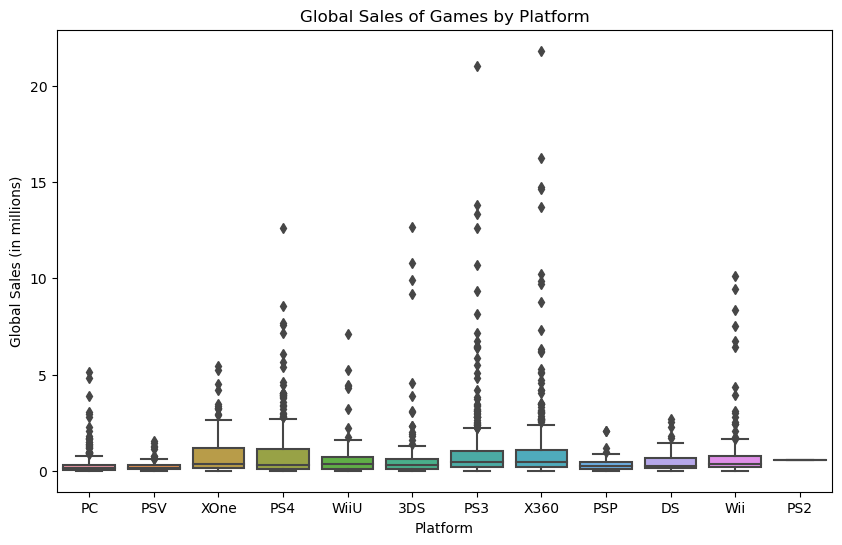

In [25]:
#box plot for global sales of all games by platform
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='platform', y='total_sales', data=data)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

To analyze the significance of the differences in sales, we can compare the interquartile range (IQR) of each platform. If the IQR of two platforms overlap, then the difference in sales is not significant. However, if the IQRs do not overlap, then there is a significant difference

In [26]:
#average sales per platform
avg_sales_by_platform = data.groupby('platform')['total_sales'].mean()

#median sales per platform
med_sales_by_platform = data.groupby('platform')['total_sales'].median()
print(avg_sales_by_platform, med_sales_by_platform)

platform
3DS     0.752303
DS      0.521316
PC      0.333817
PS2     0.590000
PS3     0.998068
PS4     1.008506
PSP     0.374035
PSV     0.260000
Wii     0.994032
WiiU    0.736333
X360    1.103779
XOne    0.805093
Name: total_sales, dtype: float64 platform
3DS     0.290
DS      0.265
PC      0.130
PS2     0.590
PS3     0.460
PS4     0.320
PSP     0.270
PSV     0.170
Wii     0.340
WiiU    0.370
X360    0.450
XOne    0.360
Name: total_sales, dtype: float64


In [27]:
#Getting the data for one popular platform
ps3 = data[data['platform'] == 'PS3']
ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15418,Xblaze: Lost Memories,PS3,2015,Adventure,0.02,0.00,0.00,0.00,63.0,6.2,M,0.02
3416,Metal Gear Solid V: Ground Zeroes,PS3,2014,Action,0.14,0.12,0.27,0.05,66.0,5.9,M,0.58
10855,Pac-Man and the Ghostly Adventures 2,PS3,2014,Adventure,0.05,0.03,0.00,0.02,59.0,6.3,E10+,0.10
11014,Digimon All-Star Rumble,PS3,2014,Fighting,0.06,0.02,0.00,0.02,49.0,5.8,E10+,0.10
11022,Yaiba: Ninja Gaiden Z,PS3,2014,Action,0.05,0.03,0.00,0.02,43.0,4.5,M,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...
4552,Atelier Totori: The Adventurer of Arland,PS3,2010,Role-Playing,0.12,0.06,0.21,0.03,74.0,6.7,T,0.42
4530,Alpha Protocol,PS3,2010,Role-Playing,0.19,0.17,0.00,0.07,64.0,6.9,M,0.43
4497,Hyperdimension Neptunia,PS3,2010,Role-Playing,0.22,0.09,0.07,0.04,45.0,7.0,T,0.42
4491,Naughty Bear,PS3,2010,Action,0.18,0.18,0.00,0.07,43.0,5.5,T,0.43


Text(0, 0.5, 'Sales')

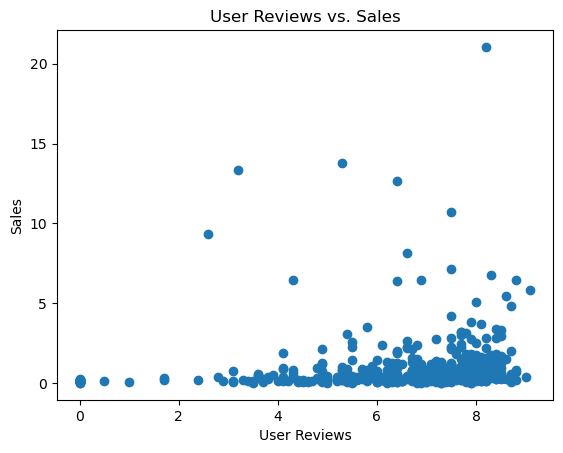

In [28]:
# Create scatter plot of user score against sales for ps2
plt.scatter(ps3['user_score'], ps3['total_sales'])
plt.title('User Reviews vs. Sales')
plt.xlabel('User Reviews')
plt.ylabel('Sales')

In [29]:
# Calculate correlation between user_score and total sales for PS3
corr = ps3['user_score'].corr(ps3['total_sales'])
print('Correlation: ', corr)

Correlation:  0.12600175339991038


Text(0, 0.5, 'Sales')

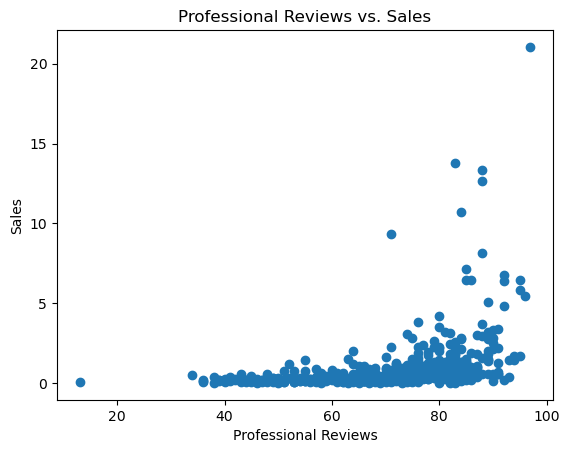

In [30]:
# Create scatter plot of critic score against sales for ps2
plt.scatter(ps3['critic_score'], ps3['total_sales'])
plt.title('Professional Reviews vs. Sales')
plt.xlabel('Professional Reviews')
plt.ylabel('Sales')

In [31]:
# Calculate correlation between critic_score and total sales for PS3
corr = ps3['critic_score'].corr(ps3['total_sales'])
print('Correlation: ', corr)

Correlation:  0.4002943616122717


Text(0, 0.5, 'Sales')

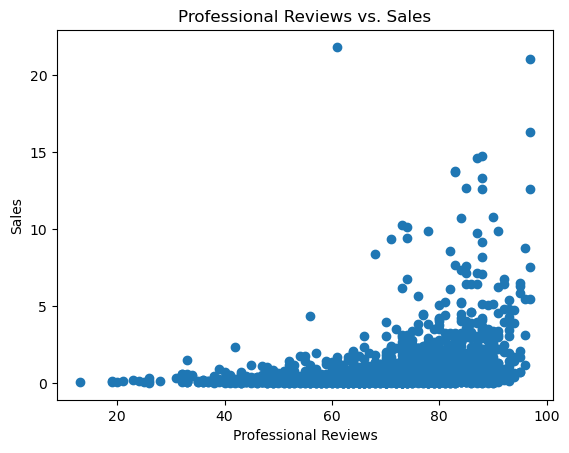

In [32]:
# Create scatter plot of critic score against sales for all platforms
plt.scatter(data['critic_score'], data['total_sales'])
plt.title('Professional Reviews vs. Sales')
plt.xlabel('Professional Reviews')
plt.ylabel('Sales')

In [33]:
# Calculate correlation between critic_score and total sales for all platforms
corr = data['critic_score'].corr(data['total_sales'])
print('Correlation: ', corr)

Correlation:  0.31828210775782984


Text(0, 0.5, 'Sales')

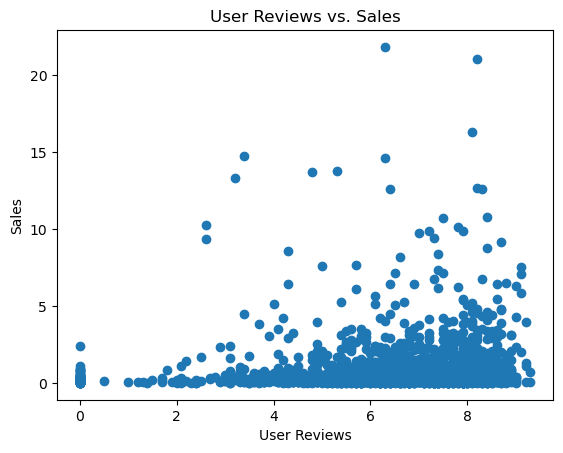

In [34]:
# Create scatter plot of user score against sales for all platforms
plt.scatter(data['user_score'], data['total_sales'])
plt.title('User Reviews vs. Sales')
plt.xlabel('User Reviews')
plt.ylabel('Sales')

In [35]:
# Calculate correlation between user_score and total sales for PS3
corr = data['user_score'].corr(data['total_sales'])
print('Correlation: ', corr)

Correlation:  0.09980511771278641


In [36]:
sales_by_genre = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
sales_by_genre

genre
Action          515.03
Shooter         409.02
Sports          230.85
Role-Playing    174.33
Misc            135.67
Platform         98.82
Racing           96.06
Fighting         58.11
Simulation       41.78
Adventure        28.64
Strategy         25.48
Puzzle           11.13
Name: total_sales, dtype: float64

In [37]:
top_genre = sales_by_genre[:5]
top_genre

genre
Action          515.03
Shooter         409.02
Sports          230.85
Role-Playing    174.33
Misc            135.67
Name: total_sales, dtype: float64

In [38]:
# filter the data to only include the top genres
top_genre_data = data[data['genre'].isin(top_genre.index)]
top_genre_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8339,Deus Ex: Mankind Divided,XOne,2016,Role-Playing,0.09,0.06,0.00,0.01,83.0,7.2,M,0.16
3250,Mafia III,XOne,2016,Action,0.28,0.29,0.00,0.05,67.0,4.6,M,0.62
1806,Watch Dogs 2,PS4,2016,Action,0.37,0.58,0.00,0.18,83.0,7.8,M,1.13
15021,Assault Suit Leynos,PS4,2016,Shooter,0.02,0.00,0.00,0.00,67.0,0.0,E10+,0.02
2718,Titanfall 2,PS4,2016,Shooter,0.34,0.25,0.05,0.12,89.0,8.4,M,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...
4427,SOCOM: U.S. Navy SEALs Fireteam Bravo 3,PSP,2010,Shooter,0.17,0.13,0.06,0.08,74.0,8.0,T,0.44
10319,Cabela's North American Adventures,X360,2010,Sports,0.10,0.00,0.00,0.01,51.0,9.0,T,0.11
4379,Brunswick Pro Bowling,X360,2010,Sports,0.38,0.04,0.00,0.03,44.0,0.0,E,0.45
4372,Disney Guilty Party,Wii,2010,Misc,0.42,0.00,0.00,0.03,78.0,8.0,E,0.45


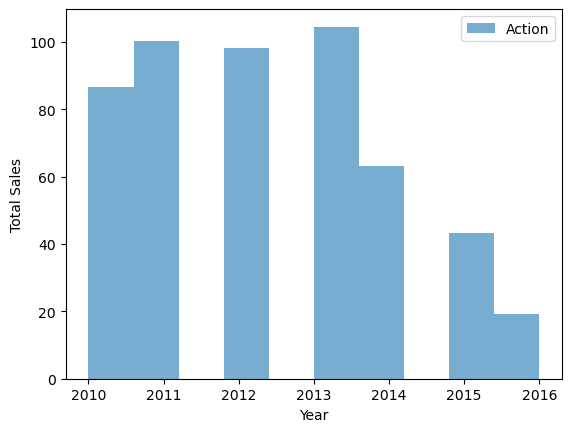

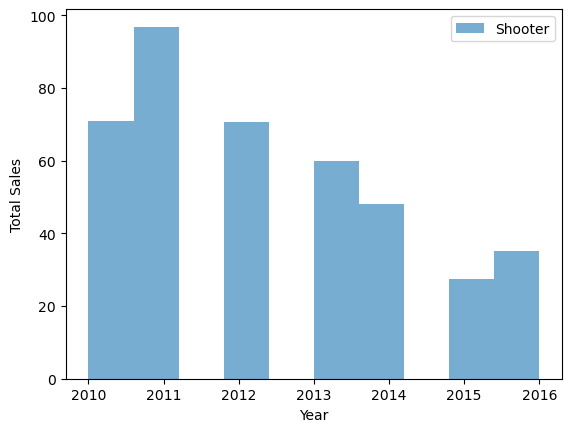

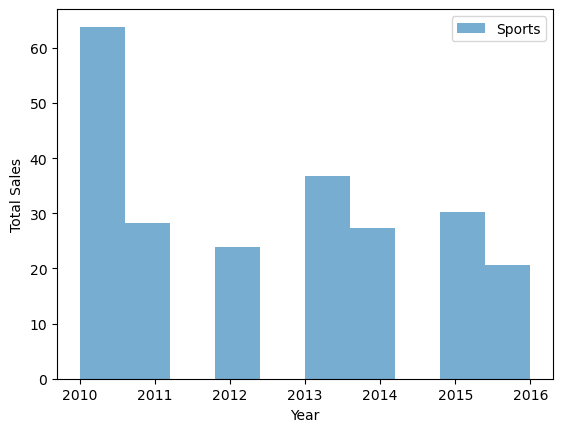

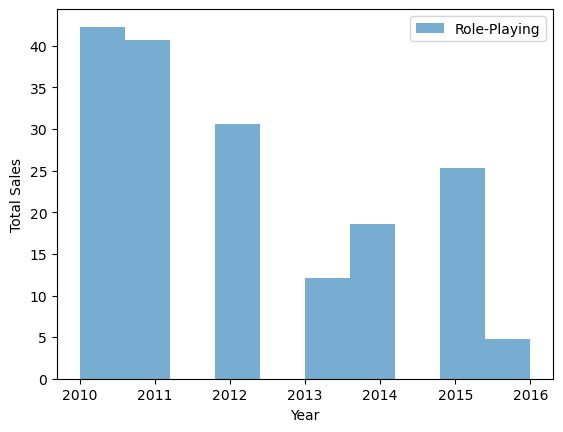

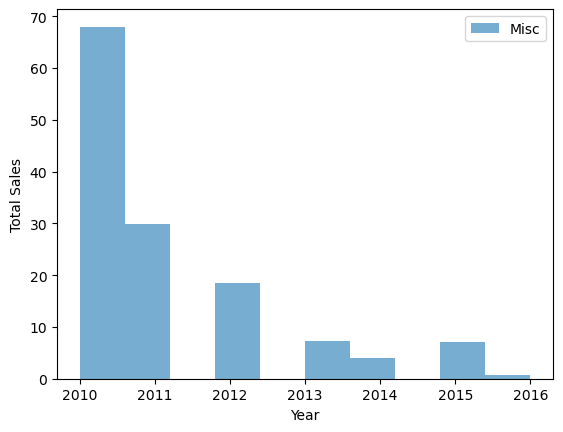

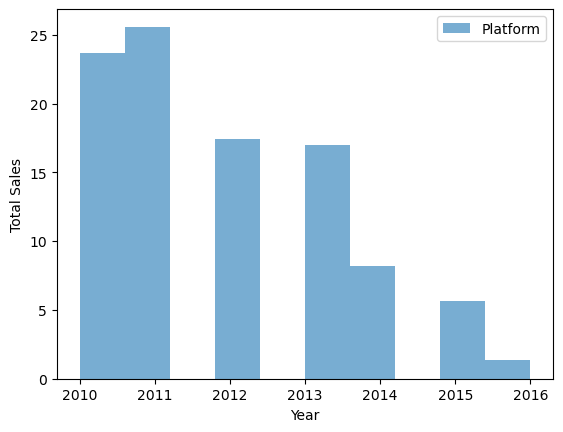

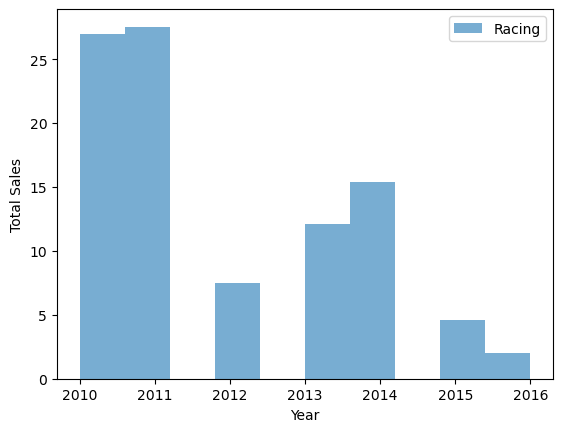

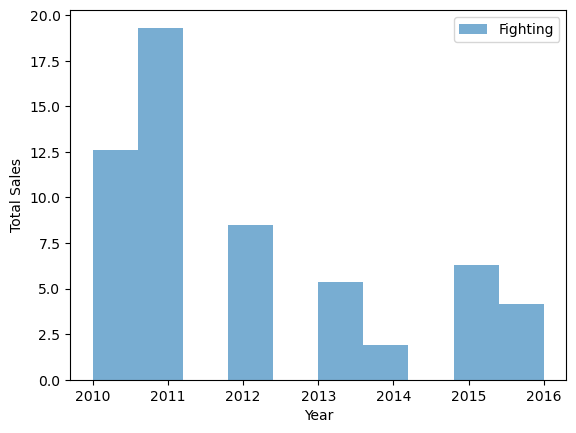

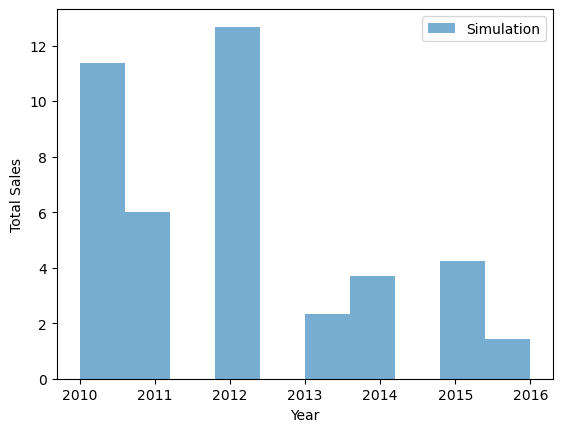

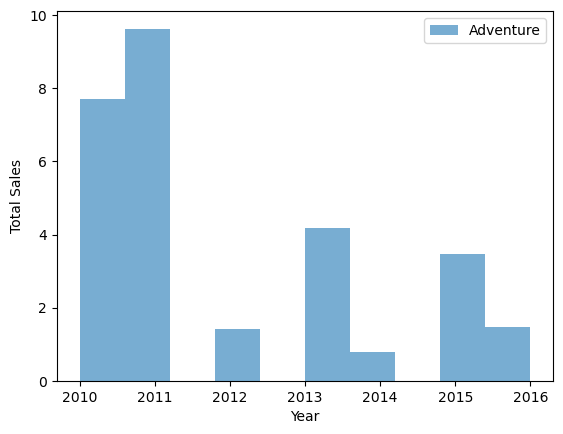

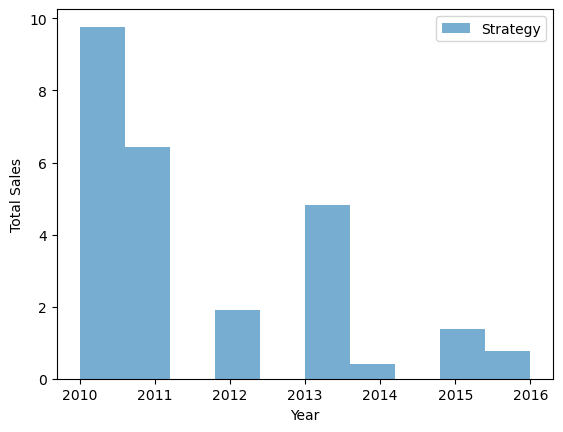

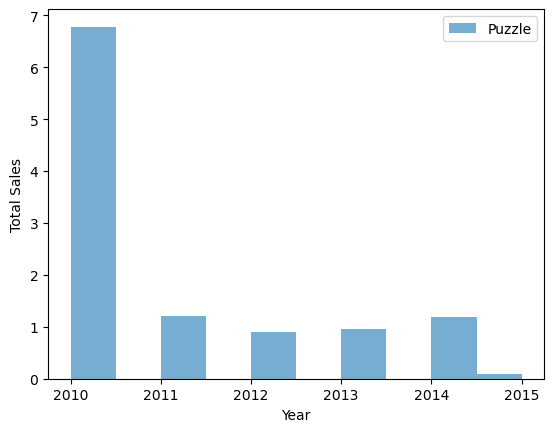

In [39]:
# plot the distribution of sales for each genre 

for genre in sales_by_genre.index:
    fig,axis = plt.subplots()
    genre_data = data[data['genre'] == genre]
    plt.hist(genre_data['year_of_release'], weights=genre_data['total_sales'], alpha=0.6, label=genre)

    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()

# NORTH AMERICAN REGION

In [40]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10963,Football Manager 2017,PC,2016,Simulation,0.00,0.09,0.00,0.01,81.0,4.3,E,0.10
13464,Root Letter,PSV,2016,Adventure,0.00,0.03,0.01,0.01,78.0,7.8,M,0.05
6995,XCOM 2,PC,2016,Strategy,0.09,0.12,0.00,0.02,88.0,7.1,T,0.23
8339,Deus Ex: Mankind Divided,XOne,2016,Role-Playing,0.09,0.06,0.00,0.01,83.0,7.2,M,0.16
3250,Mafia III,XOne,2016,Action,0.28,0.29,0.00,0.05,67.0,4.6,M,0.62


In [41]:
#Top 5 platforms in NA
na_platforms = data.groupby(['rating', 'platform'])['na_sales'].sum().sort_values(ascending=False)[:5]
na_platforms

rating  platform
M       X360        154.68
        PS3          98.28
E       X360         61.65
M       XOne         43.25
T       X360         42.38
Name: na_sales, dtype: float64

In [42]:
#Top 5 Genre in NA
na_genre = data.groupby(['rating', 'genre'])['na_sales'].sum().sort_values(ascending=False)[:5]
na_genre

rating  genre       
M       Shooter         178.56
        Action          122.94
E       Sports           90.24
M       Role-Playing     46.84
E10+    Action           44.98
Name: na_sales, dtype: float64

EU Region

In [43]:
#Top 5 platforms in EU
eu_platforms = data.groupby(['rating', 'platform'])['eu_sales'].sum().sort_values(ascending=False)[:5]
eu_platforms

rating  platform
M       PS3         90.73
        X360        74.05
        PS4         57.43
E       PS3         36.49
T       PS3         30.15
Name: eu_sales, dtype: float64

In [44]:
#Top 5 Genre in NA
eu_genre = data.groupby(['rating', 'genre'])['eu_sales'].sum().sort_values(ascending=False)[:5]
eu_genre

rating  genre       
M       Shooter         126.65
        Action          106.27
E       Sports           68.71
M       Role-Playing     35.45
T       Action           32.81
Name: eu_sales, dtype: float64

JP Region

In [45]:
#Top 5 platforms in EU
jp_platforms = data.groupby(['rating', 'platform'])['jp_sales'].sum().sort_values(ascending=False)[:5]
jp_platforms

rating  platform
E       3DS         21.58
M       PS3         16.55
T       PS3         15.94
E       Wii          6.87
        WiiU         6.66
Name: jp_sales, dtype: float64

In [46]:
#Top 5 Genre in NA
jp_genre = data.groupby(['rating', 'genre'])['jp_sales'].sum().sort_values(ascending=False)[:5]
jp_genre

rating  genre       
T       Role-Playing    16.56
M       Action          12.72
E       Platform        12.08
T       Action          11.49
M       Shooter          8.74
Name: jp_sales, dtype: float64

Null Hypothesis for the First Test: The average user ratings of the Xbox One and PC platforms are equal.
Alternative Hypothesis for the First Test: The average user ratings of the Xbox One and PC platforms are not equal.
Alpha value is 0.05

# First test

In [49]:
#User ratings for xbox_one
xbox_one = data[data['platform'] == 'XOne']['user_score']
xbox_one

8339     7.2
3250     4.6
13413    8.1
758      6.9
14982    0.0
        ... 
2543     5.9
1176     6.8
493      4.3
847      6.6
738      5.9
Name: user_score, Length: 161, dtype: float64

In [50]:
#user rating for PC
pc = data[data['platform'] == 'PC']['user_score']
pc

10963    4.3
6995     7.1
13535    8.6
11450    8.0
9955     4.2
        ... 
4880     8.8
4222     7.3
4055     6.4
10616    4.1
10373    5.2
Name: user_score, Length: 317, dtype: float64

In [51]:
import scipy.stats as stats

In [52]:
# calculate the mean and standard deviation of each group
mean1 = xbox_one.mean()
std1 = xbox_one.std()
mean2 = pc.mean()
std2 = pc.std()

In [53]:
# calculate the t-statistic and p-value using the stats.ttest_ind function
t, p = stats.ttest_ind(xbox_one, pc)

In [57]:
print("xbox_one mean:", mean1)
print("xbox_one std:", std1)
print("PC mean:", mean2)
print("PC std:", std2)
print("t-statistic:", t)
print("p-value:", p)

xbox_one mean: 6.412422360248447
xbox_one std: 1.513099375618435
PC mean: 6.489274447949526
PC std: 1.5695314276203791
t-statistic: -0.5120717209415053
p-value: 0.608838310751888


If the p-value obtained from the test is less than the alpha threshold value, we reject the null hypothesis. If it is greater than the alpha threshold value, we fail to reject the null hypothesis.
In this case the p-value is greater than the alpha value, hence we fail to reject the null hypothesis

# Second test

In [56]:
#User ratings for action game genre
action = data[data['genre'] == 'Action']['user_score']
action

3250     4.6
1806     7.8
14902    7.8
14836    6.6
6916     6.8
        ... 
10373    5.2
4356     5.0
4616     7.0
4491     5.5
4457     7.5
Name: user_score, Length: 697, dtype: float64

In [58]:
#User ratings for sports game genre
sports = data[data['genre'] == 'Sports']['user_score']
sports

4358     7.6
9955     4.2
571      5.5
15407    3.7
13384    6.1
        ... 
10167    4.1
10668    0.0
4579     6.7
10319    9.0
4379     0.0
Name: user_score, Length: 256, dtype: float64

In [59]:
# calculate the mean and standard deviation of each group
action_game_mean = action.mean()
action_game_std = action.std()
sports_game_mean = sports.mean()
sports_game_std = sports.std()

In [60]:
# calculate the t-statistic and p-value using the stats.ttest_ind function
t, p = stats.ttest_ind(action, sports)

In [61]:
print("action game mean user score:", action_game_mean)
print("action game user score std:", action_game_std)
print("sports game mean user score:", sports_game_mean)
print("sports game user score std:", sports_game_std)
print("t-statistic:", t)
print("p-value:", p)

action game mean user score: 6.463127690100431
action game user score std: 1.9858921898497657
sports game mean user score: 5.722265625
sports game user score std: 2.120361683850927
t-statistic: 5.011511825832339
p-value: 6.438303807459261e-07


p-value is smaller than the alpha value, hence we reject the null hypothesis